In [181]:
import pandas as pd
import random
data = pd.DataFrame(
{
    "x" : [random.normalvariate(0, 1) for _ in range(20)],
    "y" : [random.normalvariate(5, 5) for _ in range(20)],
    "z" : [random.normalvariate(10, 10) for _ in range(20)],
    "a" : [random.expovariate(1) for _ in range(20)],
    "b" : [random.normalvariate(2, 2) for _ in range(20)],
    "c" : [random.expovariate(0.1) for _ in range(20)]
})

data

,x,y,z,a,b,c
0,-0.953946,10.300874,13.373459,0.648876,-0.235519,8.389964
1,-1.857499,1.182167,19.753005,0.633400,1.208979,23.545919
2,0.381676,2.196069,13.259390,0.321422,-0.217401,19.465459
3,0.015408,1.423393,5.764946,2.149376,0.743834,7.383968
4,-0.499904,2.371264,6.518545,0.308166,0.872760,1.509380
5,-0.443833,11.290211,11.595008,0.394870,1.451879,8.714225
6,-0.786399,0.811573,21.298512,0.087477,1.831716,2.709991
7,-0.379046,5.211495,4.445515,0.688493,1.009844,25.384116
8,-1.335450,2.086609,18.275496,0.964830,4.556076,5.030291
9,0.748632,8.554725,17.479370,1.183818,1.264435,1.656462


In [182]:
file = 'Coeficients for the W test for normality.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)
control_data = xl.parse('Лист1')
print(control_data)

['Лист1']
    i\n       2       3       4       5       6       7       8       9  \
0     1  0.7071  0.7071  0.6872  0.6646  0.6431  0.6233  0.6052  0.5888   
1     2     NaN     NaN  0.1677  0.2413  0.2806  0.3031  0.3164  0.3244   
2     3     NaN     NaN     NaN     NaN  0.0875  0.1401  0.1743  0.1976   
3     4     NaN     NaN     NaN     NaN     NaN     NaN  0.0561  0.0947   
4     5     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5     6     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6     7     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7     8     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8     9     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
9    10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
10   11     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11   12     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
12   13     NaN

In [183]:
from scipy import stats
def check_shapir(Mass):
    result = stats.shapiro(Mass)
    if result[0] > 0.905:
        return("normal")
    else:
        return("non-normal")

In [184]:
check_shapir(data["x"])

'normal'

In [185]:
check_shapir(data["y"])

'normal'

In [186]:
check_shapir(data["z"])

'normal'

In [187]:
check_shapir(data["a"])

'non-normal'

In [188]:
check_shapir(data["b"])

'normal'

In [189]:
check_shapir(data["c"])

'non-normal'

In [190]:
output_data = pd.DataFrame(
{
    "Variable" : ["" for _ in range(6)],
    "Statistics" : ["" for _ in range(6)],
    "Distribution" : ["" for _ in range(6)],
})
output_data

,Variable,Statistics,Distribution
0,,,
1,,,
2,,,
3,,,
4,,,
5,,,


In [191]:
output_data["Variable"] = ["x", "y", "z", "a", "b", "c"]
output_data["Distribution"] = [check_shapir(data["x"]), 
                               check_shapir(data["y"]), 
                               check_shapir(data["z"]), 
                               check_shapir(data["a"]), 
                               check_shapir(data["b"]), 
                               check_shapir(data["c"])]
output_data

,Variable,Statistics,Distribution
0,x,,normal
1,y,,normal
2,z,,normal
3,a,,non-normal
4,b,,normal
5,c,,non-normal


In [194]:
import numpy as np
import math
output_data["Statistics"] = ['{:.4f} [{:.4f}]'.format(np.mean(data["x"]), np.std(data["x"])), 
                            '{:.4f} [{:.4f}]'.format(np.mean(data["y"]), np.std(data["y"])),
                            '{:.4f} [{:.4f}]'.format(np.mean(data["z"]), np.std(data["z"])),
                            '{:.4f} [{:.2f} : {:.2f}]'.format(np.median(data["a"]), data["a"].quantile(.25), data["a"].quantile(.75)),
                            '{:.4f} [{:.4f}]'.format(np.mean(data["b"]), np.std(data["b"])),
                            '{:.4f} [{:.2f} : {:.2f}]'.format(np.median(data["c"]), data["c"].quantile(.25), data["c"].quantile(.75))]
output_data

,Variable,Statistics,Distribution
0,x,-0.2802 [1.0279],normal
1,y,4.8485 [5.7323],normal
2,z,11.5395 [9.4819],normal
3,a,0.5114 [0.32 : 0.76],non-normal
4,b,1.4716 [1.8493],normal
5,c,5.5069 [2.46 : 9.12],non-normal


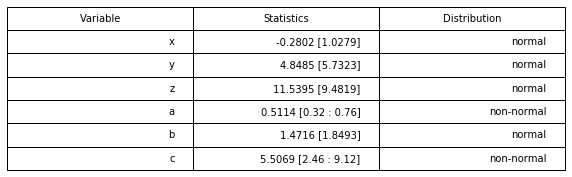

In [207]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,3))
ax = plt.subplot(111)
ax.axis('off')
ax.table(cellText=output_data.values, colLabels=output_data.columns, bbox=[0,0,1,1])
fig.savefig('Final_data_Laba4.pdf')
plt.show()